# PLANT PATHOLOGIES LINEAR MODEL

#### IMPORTS

In [1]:
from data_generator import load_dataset
from test_model import prediction
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.layers import *
from tensorflow.keras.activations import *
from tensorflow.keras.optimizers import *
from tensorflow.keras.losses import *
from tensorflow.keras.metrics import *
from tensorflow.keras.initializers import *
from tensorflow.keras.utils import *
from tensorflow.keras.models import *
import random
import cv2
import numpy as np

#### LOAD DATASET

In [3]:
x_train, y_train, x_test, y_test = load_dataset((256, 256))

Plant Health dataset downloading.
Directory ./data/ already exist.
Dataset already install.
Load plant image names and pathologies.
Load plant images.
Creation of the final dataset.


In [4]:
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((1456, 256, 256, 3), (1456,), (365, 256, 256, 3), (365,))

#### FUNCTIONS

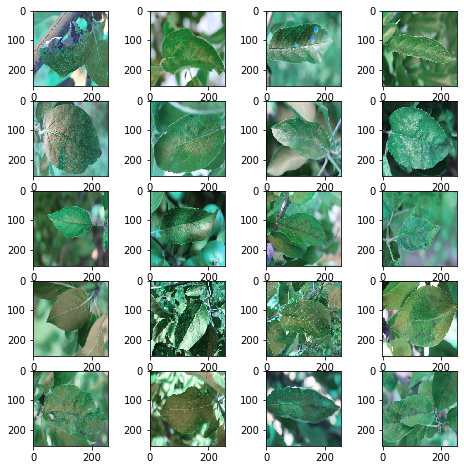

In [13]:
def plot_sample(class_names, train_images, train_label, augm=None):
    
    w=10
    h=10
    fig=plt.figure(figsize=(8, 8))
    columns = 4
    rows = 5

    for i in range(1, columns * rows +1):
        
        if augm is not None:
            img = augm.random_transform(train_images[i])
        else:
            img = train_images[i]

        fig.add_subplot(rows, columns, i)
        plt.imshow(img)
        
    plt.show()


class_names = ["combinations", "healthy", "rust", "scrab"]
plot_sample(class_names, x_train, y_train)

In [9]:
def history_model(history, modelName):
  
    plt.subplot(121)
    plt.plot(history['sparse_categorical_accuracy'])
    plt.plot(history['val_sparse_categorical_accuracy'])
    plt.title(modelName + ' Accuracy')
    plt.ylabel('sparse_categorical_accuracy')
    plt.xlabel('epochs')
    plt.ylim([0.0,1.0])
    plt.legend(['train_accuracy', 'val_sparse_categorical_accuracy'])

    plt.subplot(122)
    plt.plot(history['loss'])
    plt.plot(history['val_loss'])
    plt.title(modelName + ' Loss')
    plt.ylabel('loss')
    plt.xlabel('epochs')
    plt.ylim([0.0,3.0])
    plt.legend(['train_loss', 'val_loss'])

    plt.show()

In [10]:
def confusion(class_names, test_label, predict_one_hot):

    predict1D = []
    for pred in predict_one_hot:
        predict1D.append(pred.argmax())
    predict1D = np.array(predict1D)
    
    cm = tf.math.confusion_matrix(labels=test_label, predictions=predict1D, num_classes=len(class_names))
    
    plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
    plt.tight_layout()
    plt.colorbar()
    tick_marks = np.arange(len(class_names))
    plt.xticks(tick_marks, range(len(class_names)))
    plt.yticks(tick_marks, range(len(class_names)))
    plt.xlabel('Predicted')
    plt.ylabel('True')
    
    plt.show()

In [11]:
def plot_error(class_names, model, test_images, test_label):
    
    predict = model.predict(test_images)
   
    for i in range(0, len(class_names)):
        
        for j in range(0, predict.shape[0]):
            
            if(test_label[j] == i and i != predict[j].argmax()):
                
                plt.imshow(test_images[j])
                plt.show()
                print("sample: {0} precition: {1}".format(class_names[i], class_names[predict[j].argmax()]))
                break



In [16]:
def to_gray_scale(x_train):
    
    x_gray_train = []
    
    for x in x_train:
        
        x_gray_train.append(cv2.cvtColor(x, cv2.COLOR_BGR2GRAY))
    
    return np.array(x_gray_train)

#### MODEL TRAINING

In [11]:
def create_model():
    model = Sequential()
    model.add(Flatten(input_shape=x_train[0].shape))
    model.add(Dense(4, activation="softmax"))
    model.compile(loss=sparse_categorical_crossentropy,
                  metrics=[sparse_categorical_accuracy])
    return model

model = create_model()
print(model.summary())

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 196608)            0         
_________________________________________________________________
dense (Dense)                (None, 4)                 786436    
Total params: 786,436
Trainable params: 786,436
Non-trainable params: 0
_________________________________________________________________
None


In [12]:
x_train = x_train / 255
x_test = x_test / 255

In [13]:
EPOCHS=100
BATCH_SIZE=32

In [14]:
history = model.fit(x_train, y_train, validation_data=(x_test, y_test),
          epochs=EPOCHS,
          batch_size=BATCH_SIZE)



model.save('saved_model/linear_1/')

Train on 1456 samples, validate on 365 samples
Epoch 1/100
1456/1456 [==============================] - 3s 2ms/sample - loss: 72.4871 - sparse_categorical_accuracy: 0.3111 - val_loss: 83.9132 - val_sparse_categorical_accuracy: 0.3014
Epoch 2/100
1456/1456 [==============================] - 2s 2ms/sample - loss: 55.8064 - sparse_categorical_accuracy: 0.3221 - val_loss: 76.1553 - val_sparse_categorical_accuracy: 0.3425
Epoch 3/100
1456/1456 [==============================] - 2s 2ms/sample - loss: 54.8043 - sparse_categorical_accuracy: 0.3036 - val_loss: 38.1479 - val_sparse_categorical_accuracy: 0.2932
Epoch 4/100
1456/1456 [==============================] - 2s 2ms/sample - loss: 52.5645 - sparse_categorical_accuracy: 0.3420 - val_loss: 83.7334 - val_sparse_categorical_accuracy: 0.3014
Epoch 5/100
1456/1456 [==============================] - 2s 2ms/sample - loss: 53.0642 - sparse_categorical_accuracy: 0.3276 - val_loss: 28.2411 - val_sparse_categorical_accuracy: 0.4137
Epoch 6/100
1456/1

Epoch 88/100
1456/1456 [==============================] - 2s 2ms/sample - loss: 26.9974 - sparse_categorical_accuracy: 0.5810 - val_loss: 35.2564 - val_sparse_categorical_accuracy: 0.3918
Epoch 89/100
1456/1456 [==============================] - 2s 2ms/sample - loss: 24.1611 - sparse_categorical_accuracy: 0.5584 - val_loss: 99.8051 - val_sparse_categorical_accuracy: 0.3041
Epoch 90/100
1456/1456 [==============================] - 2s 1ms/sample - loss: 23.0541 - sparse_categorical_accuracy: 0.5728 - val_loss: 49.1910 - val_sparse_categorical_accuracy: 0.3973
Epoch 91/100
1456/1456 [==============================] - 2s 2ms/sample - loss: 24.7526 - sparse_categorical_accuracy: 0.5804 - val_loss: 25.0633 - val_sparse_categorical_accuracy: 0.3863
Epoch 92/100
1456/1456 [==============================] - 2s 2ms/sample - loss: 21.7569 - sparse_categorical_accuracy: 0.6065 - val_loss: 112.4158 - val_sparse_categorical_accuracy: 0.3068
Epoch 93/100
1456/1456 [==============================] - 2

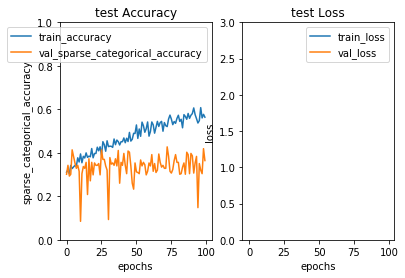

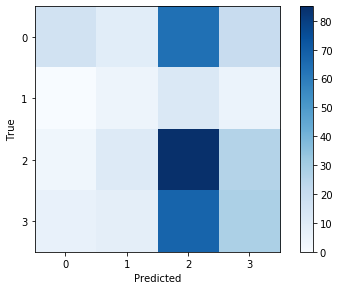

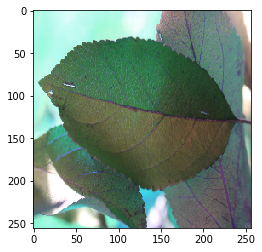

sample: combinations precition: rust


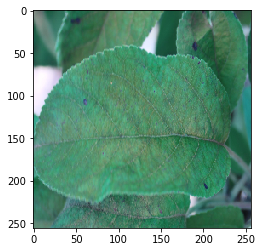

sample: healthy precition: rust


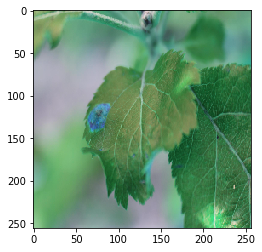

sample: rust precition: healthy


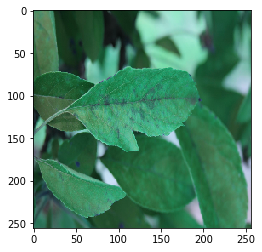

sample: scrab precition: rust


In [15]:
history_model(history.history, "test")
confusion(class_names, y_test, model.predict(x_test))
plot_error(class_names, model, x_test, y_test)

In [14]:
prediction((256, 256), model, "predict_linear.csv")

Load test images names.
Load plant test images.
Genrerate predictions.
Generate answer file: ./output/predict_linear.csv.


#### SMALL DROPOUT

In [19]:
x_train, y_train, x_test, y_test = load_dataset((256, 256))

Plant Health dataset downloading.
Directory ./data/ already exist.
Dataset already install.
Load plant image names and pathologies.
Load plant images.
Creation of the final dataset.


In [20]:
def create_model():
    model = Sequential()
    model.add(Flatten(input_shape=x_train[0].shape))
    model.add(Dropout(0.01))
    model.add(Dense(4, activation="softmax"))
    model.compile(loss=sparse_categorical_crossentropy,
                  metrics=[sparse_categorical_accuracy])
    return model

model = create_model()
print(model.summary())

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_2 (Flatten)          (None, 196608)            0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 196608)            0         
_________________________________________________________________
dense_2 (Dense)              (None, 4)                 786436    
Total params: 786,436
Trainable params: 786,436
Non-trainable params: 0
_________________________________________________________________
None


In [21]:
x_train = x_train / 255
x_test = x_test / 255

In [22]:
EPOCHS=100
BATCH_SIZE=32

In [23]:
history = model.fit(x_train, y_train, validation_data=(x_test, y_test),
          epochs=EPOCHS,
          batch_size=BATCH_SIZE)



model.save('saved_model/linear_1_dropout/')

Train on 1456 samples, validate on 365 samples
Epoch 1/100
1456/1456 [==============================] - 10s 7ms/sample - loss: 71.7293 - sparse_categorical_accuracy: 0.3317 - val_loss: 21.2651 - val_sparse_categorical_accuracy: 0.3616
Epoch 2/100
1456/1456 [==============================] - 5s 3ms/sample - loss: 58.4808 - sparse_categorical_accuracy: 0.3111 - val_loss: 44.1532 - val_sparse_categorical_accuracy: 0.3425
Epoch 3/100
1456/1456 [==============================] - 5s 4ms/sample - loss: 54.6435 - sparse_categorical_accuracy: 0.3262 - val_loss: 81.7282 - val_sparse_categorical_accuracy: 0.2986
Epoch 4/100
1456/1456 [==============================] - 5s 3ms/sample - loss: 51.3155 - sparse_categorical_accuracy: 0.3352 - val_loss: 22.3016 - val_sparse_categorical_accuracy: 0.3973
Epoch 5/100
1456/1456 [==============================] - 5s 3ms/sample - loss: 52.3153 - sparse_categorical_accuracy: 0.3448 - val_loss: 52.9189 - val_sparse_categorical_accuracy: 0.3425
Epoch 6/100
1456/

Epoch 88/100
1456/1456 [==============================] - 5s 3ms/sample - loss: 25.3626 - sparse_categorical_accuracy: 0.5694 - val_loss: 26.5600 - val_sparse_categorical_accuracy: 0.3836
Epoch 89/100
1456/1456 [==============================] - 5s 4ms/sample - loss: 25.7674 - sparse_categorical_accuracy: 0.5488 - val_loss: 48.0674 - val_sparse_categorical_accuracy: 0.3945
Epoch 90/100
1456/1456 [==============================] - 5s 3ms/sample - loss: 24.8143 - sparse_categorical_accuracy: 0.5508 - val_loss: 61.1879 - val_sparse_categorical_accuracy: 0.3315
Epoch 91/100
1456/1456 [==============================] - 5s 3ms/sample - loss: 23.3957 - sparse_categorical_accuracy: 0.5797 - val_loss: 35.3791 - val_sparse_categorical_accuracy: 0.3781
Epoch 92/100
1456/1456 [==============================] - 5s 3ms/sample - loss: 26.2217 - sparse_categorical_accuracy: 0.5515 - val_loss: 60.4517 - val_sparse_categorical_accuracy: 0.3726
Epoch 93/100
1456/1456 [==============================] - 5s

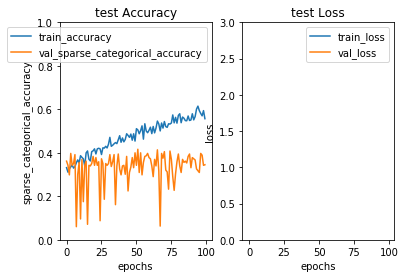

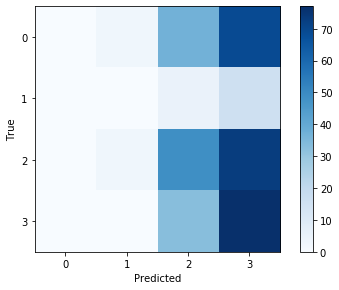

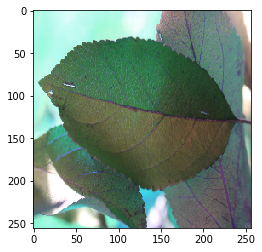

sample: combinations precition: scrab


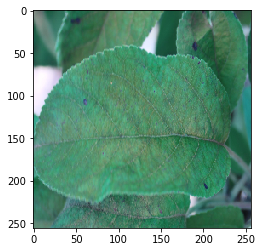

sample: healthy precition: scrab


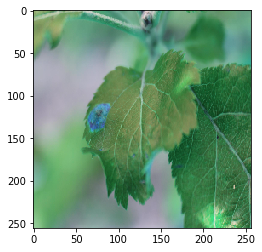

sample: rust precition: scrab


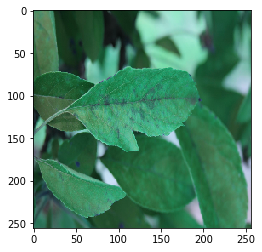

sample: scrab precition: rust


In [24]:
history_model(history.history, "test")
confusion(class_names, y_test, model.predict(x_test))
plot_error(class_names, model, x_test, y_test)

#### BIG DROPOUT

In [2]:
x_train, y_train, x_test, y_test = load_dataset((256, 256))

Plant Health dataset downloading.
Directory ./data/ already exist.
Dataset already install.
Load plant image names and pathologies.
Load plant images.
Creation of the final dataset.


In [4]:
def create_model():
    model = Sequential()
    model.add(Flatten(input_shape=x_train[0].shape))
    model.add(Dropout(0.5))
    model.add(Dense(4, activation="softmax"))
    model.compile(loss=sparse_categorical_crossentropy,
                  metrics=[sparse_categorical_accuracy])
    return model

model = create_model()
print(model.summary())

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_1 (Flatten)          (None, 196608)            0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 196608)            0         
_________________________________________________________________
dense_1 (Dense)              (None, 4)                 786436    
Total params: 786,436
Trainable params: 786,436
Non-trainable params: 0
_________________________________________________________________
None


In [5]:
x_train = x_train / 255
x_test = x_test / 255

In [6]:
EPOCHS=100
BATCH_SIZE=32

In [7]:
history = model.fit(x_train, y_train, validation_data=(x_test, y_test),
          epochs=EPOCHS,
          batch_size=BATCH_SIZE)



model.save('saved_model/linear_1_dropout/')

Train on 1547 samples, validate on 274 samples
Epoch 1/100
1547/1547 [==============================] - 8s 5ms/sample - loss: 68.9135 - sparse_categorical_accuracy: 0.3154 - val_loss: 39.5723 - val_sparse_categorical_accuracy: 0.4270
Epoch 2/100
1547/1547 [==============================] - 5s 3ms/sample - loss: 54.3723 - sparse_categorical_accuracy: 0.3142 - val_loss: 52.4029 - val_sparse_categorical_accuracy: 0.2847
Epoch 3/100
1547/1547 [==============================] - 5s 3ms/sample - loss: 53.1918 - sparse_categorical_accuracy: 0.3200 - val_loss: 40.0631 - val_sparse_categorical_accuracy: 0.3978
Epoch 4/100
1547/1547 [==============================] - 5s 3ms/sample - loss: 50.2612 - sparse_categorical_accuracy: 0.3465 - val_loss: 47.3653 - val_sparse_categorical_accuracy: 0.3504
Epoch 5/100
1547/1547 [==============================] - 6s 4ms/sample - loss: 49.8959 - sparse_categorical_accuracy: 0.3387 - val_loss: 52.5178 - val_sparse_categorical_accuracy: 0.2847
Epoch 6/100
1547/1

1547/1547 [==============================] - 5s 3ms/sample - loss: 35.9572 - sparse_categorical_accuracy: 0.4421 - val_loss: 15.9662 - val_sparse_categorical_accuracy: 0.3832
Epoch 45/100
1547/1547 [==============================] - 5s 3ms/sample - loss: 30.2901 - sparse_categorical_accuracy: 0.4919 - val_loss: 21.3175 - val_sparse_categorical_accuracy: 0.3978
Epoch 46/100
1547/1547 [==============================] - 5s 3ms/sample - loss: 32.9671 - sparse_categorical_accuracy: 0.4583 - val_loss: 23.9317 - val_sparse_categorical_accuracy: 0.4088
Epoch 47/100
1547/1547 [==============================] - 5s 3ms/sample - loss: 32.2793 - sparse_categorical_accuracy: 0.4932 - val_loss: 83.5458 - val_sparse_categorical_accuracy: 0.3285
Epoch 48/100
1547/1547 [==============================] - 5s 3ms/sample - loss: 30.0807 - sparse_categorical_accuracy: 0.5036 - val_loss: 25.7836 - val_sparse_categorical_accuracy: 0.3905
Epoch 49/100
1547/1547 [==============================] - 5s 3ms/sample -

Epoch 88/100
1547/1547 [==============================] - 5s 3ms/sample - loss: 26.0588 - sparse_categorical_accuracy: 0.5113 - val_loss: 58.2218 - val_sparse_categorical_accuracy: 0.1971
Epoch 89/100
1547/1547 [==============================] - 5s 3ms/sample - loss: 25.5404 - sparse_categorical_accuracy: 0.5495 - val_loss: 45.3977 - val_sparse_categorical_accuracy: 0.3285
Epoch 90/100
1547/1547 [==============================] - 5s 3ms/sample - loss: 26.1822 - sparse_categorical_accuracy: 0.5540 - val_loss: 27.5587 - val_sparse_categorical_accuracy: 0.3942
Epoch 91/100
1547/1547 [==============================] - 5s 3ms/sample - loss: 20.8663 - sparse_categorical_accuracy: 0.5941 - val_loss: 52.5467 - val_sparse_categorical_accuracy: 0.3212
Epoch 92/100
1547/1547 [==============================] - 5s 3ms/sample - loss: 23.0336 - sparse_categorical_accuracy: 0.5682 - val_loss: 114.7612 - val_sparse_categorical_accuracy: 0.3504
Epoch 93/100
1547/1547 [==============================] - 5

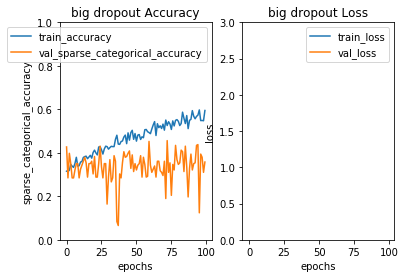

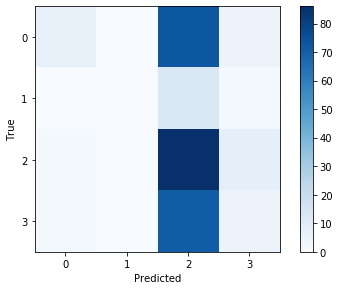

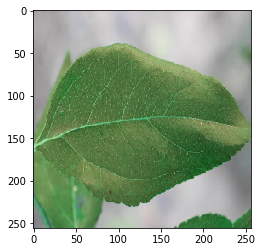

sample: combinations precition: rust


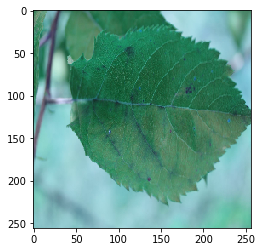

sample: healthy precition: rust


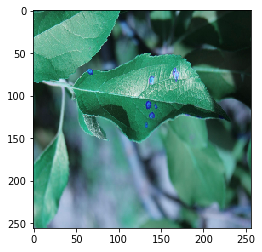

sample: rust precition: scrab


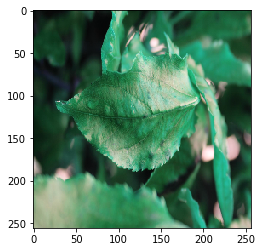

sample: scrab precition: rust


In [14]:
history_model(history.history, "big dropout")
confusion(class_names, y_test, model.predict(x_test))
plot_error(class_names, model, x_test, y_test)

#### GRAY SCALE

In [15]:
x_train, y_train, x_test, y_test = load_dataset((256, 256))

Plant Health dataset downloading.
Directory ./data/ already exist.
Dataset already install.
Load plant image names and pathologies.
Load plant images.
Creation of the final dataset.


In [17]:
x_train_gray = to_gray_scale(x_train)
x_test_gray = to_gray_scale(x_test)

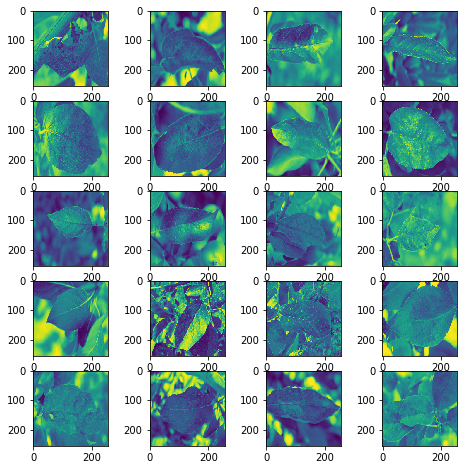

In [18]:
plot_sample(class_names, x_train_gray, y_train)

In [25]:
def create_model():
    model = Sequential()
    model.add(Flatten(input_shape=x_train_gray[0].shape))
    model.add(Dense(4, activation="softmax"))
    model.compile(loss=sparse_categorical_crossentropy,
                  metrics=[sparse_categorical_accuracy])
    return model

model = create_model()
print(model.summary())

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_3 (Flatten)          (None, 65536)             0         
_________________________________________________________________
dense_3 (Dense)              (None, 4)                 262148    
Total params: 262,148
Trainable params: 262,148
Non-trainable params: 0
_________________________________________________________________
None


In [26]:
x_train = x_train / 255
x_test = x_test / 255

In [21]:
EPOCHS=100
BATCH_SIZE=32

In [27]:
history = model.fit(x_train_gray, y_train, validation_data=(x_test_gray, y_test),
          epochs=EPOCHS,
          batch_size=BATCH_SIZE)

model.save('saved_model/data_agment/')

Train on 1547 samples, validate on 274 samples
Epoch 1/100
1547/1547 [==============================] - 1s 804us/sample - loss: 6942.1457 - sparse_categorical_accuracy: 0.3109 - val_loss: 6152.7620 - val_sparse_categorical_accuracy: 0.3504
Epoch 2/100
1547/1547 [==============================] - 1s 522us/sample - loss: 5454.2872 - sparse_categorical_accuracy: 0.3193 - val_loss: 3121.3894 - val_sparse_categorical_accuracy: 0.3066
Epoch 3/100
1547/1547 [==============================] - 1s 566us/sample - loss: 5411.6224 - sparse_categorical_accuracy: 0.3174 - val_loss: 5206.7274 - val_sparse_categorical_accuracy: 0.2847
Epoch 4/100
1547/1547 [==============================] - 1s 478us/sample - loss: 5245.7599 - sparse_categorical_accuracy: 0.3303 - val_loss: 7277.4265 - val_sparse_categorical_accuracy: 0.2883
Epoch 5/100
1547/1547 [==============================] - 1s 550us/sample - loss: 5167.5110 - sparse_categorical_accuracy: 0.3316 - val_loss: 4707.8806 - val_sparse_categorical_accur

1547/1547 [==============================] - 1s 590us/sample - loss: 3974.0408 - sparse_categorical_accuracy: 0.4053 - val_loss: 2520.3915 - val_sparse_categorical_accuracy: 0.3905
Epoch 44/100
1547/1547 [==============================] - 1s 553us/sample - loss: 4280.2166 - sparse_categorical_accuracy: 0.3956 - val_loss: 6050.1018 - val_sparse_categorical_accuracy: 0.3321
Epoch 45/100
1547/1547 [==============================] - 1s 614us/sample - loss: 4055.0394 - sparse_categorical_accuracy: 0.3950 - val_loss: 6701.3117 - val_sparse_categorical_accuracy: 0.3139
Epoch 46/100
1547/1547 [==============================] - 1s 560us/sample - loss: 4000.4229 - sparse_categorical_accuracy: 0.4001 - val_loss: 6787.6956 - val_sparse_categorical_accuracy: 0.3139
Epoch 47/100
1547/1547 [==============================] - 1s 550us/sample - loss: 3860.0961 - sparse_categorical_accuracy: 0.4124 - val_loss: 6542.1297 - val_sparse_categorical_accuracy: 0.3175
Epoch 48/100
1547/1547 [===================

1547/1547 [==============================] - 1s 559us/sample - loss: 3721.9444 - sparse_categorical_accuracy: 0.4105 - val_loss: 6212.1249 - val_sparse_categorical_accuracy: 0.2810
Epoch 86/100
1547/1547 [==============================] - 1s 484us/sample - loss: 3565.7353 - sparse_categorical_accuracy: 0.4376 - val_loss: 3680.4018 - val_sparse_categorical_accuracy: 0.3358
Epoch 87/100
1547/1547 [==============================] - 1s 471us/sample - loss: 3160.9105 - sparse_categorical_accuracy: 0.4816 - val_loss: 4233.1455 - val_sparse_categorical_accuracy: 0.3650
Epoch 88/100
1547/1547 [==============================] - 1s 454us/sample - loss: 3674.3233 - sparse_categorical_accuracy: 0.4344 - val_loss: 3190.8178 - val_sparse_categorical_accuracy: 0.2372
Epoch 89/100
1547/1547 [==============================] - 1s 534us/sample - loss: 3083.2589 - sparse_categorical_accuracy: 0.4764 - val_loss: 6569.8399 - val_sparse_categorical_accuracy: 0.3066
Epoch 90/100
1547/1547 [===================

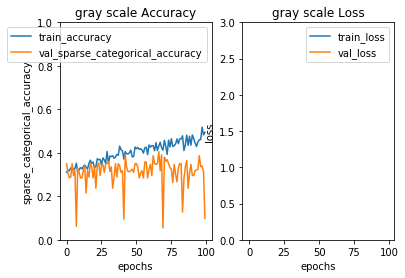

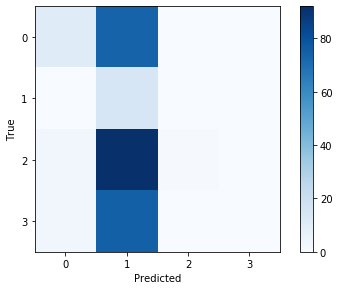

In [28]:
history_model(history.history, "gray scale")
confusion(class_names, y_test, model.predict(x_test_gray))